# Table of Contents
```
1. Business Understanding
   1.1. Problem Description
2. Data Understanding
   2.1. Import Libraries, Modules, Functions, Objects, etc.
   2.2. User Defined Functions (UDFs)
   2.3. Data Loading
   2.4. Exploratory Data Analysis (EDA)
        2.4.1. Text EDA: Understand the raw data with Descriptive Statistics
        2.4.2. Visual EDA: Understand the data with Visualizations
               2.4.2.1. Draw Univariate plots to better understand each attribute
               2.4.2.2. Draw Multivariate plots to better understand the relationship between attributes
3. Research
   3.1. List of selected algorithms to build models
   3.2. List of model evaluation metrics
4. Data Preprocessing
   4.1. Data Cleaning
        4.1.1. Basic data cleaning
        4.1.2. Outliers detection
        4.1.3. Handling missing Numerical values
        4.1.4. Handling missing Categorical values
   4.2. Feature Selection
   4.3. Feature Engineering
5. SOLUTION #1: DATA ANALYSIS
   5.1. Understanding Current Sales Performance
        5.1.1. Total Sales - by Market
        5.1.2. Total Sales - by Region
        5.1.3. Total Sales - by Product Category
        5.1.4. Sales Performance - by Quarter
   5.2. Detecting Revenue Losses
        5.2.1. Payment methods used - by Region
        5.2.2. Market-wise Revenue Loss
        5.2.3. Region-wise Revenue Loss - Top 10
        5.2.4. Product-wise Revenue Loss - Top 10
   5.3. Detecting Revenue Loss caused by Fraud
        5.3.1. Regions with Highest Fraud - Top 10
        5.3.2. Products with Highest Fraud - Top 10
        5.3.3. Customers with Highest Fraud - Top 10
   5.4. Detecting Revenue Loss caused by Late Deliveries
        5.4.1. Regions with Highest Late Deliveries - Top 10
        5.4.2. Products with Highest Late Deliveries - Top 10
        5.4.3. Regions with Highest Late Deliveries, by Shipping Mode - Top 10
6. SOLUTION #2: CUSTOMER SEGMENTATION
   6.1. Assign R_Values, F_Values, and M_Values
   6.2. Assign R_Scores, F_Scores, and M_Scores
   6.3. Assign RFM_Scores
   6.4. Assign Segment names
   6.5. Visualize Customer Segments
7. Final Report
   7.1. Background
   7.2. Summary of findings and recommendations
   7.3. Details of findings
```

# 1. Business Understanding

## 1.1. Problem Description

**`Problem statement`**:

`In business terms`: 

A Supply Chain company DataCo Global wants to achieve the following using its data generated over time:
* Understand the current performance in sales
* Increase the revenue, 
    * by discovering hidden patterns for better decision making, such as buying patterns
    * by sales
    * by reducing revenue losses
    * by process improvements

The areas of important registered activities are Provisioning, Production, Sales, and Commercial Distribution. The types of products are Clothing, Sports, and Electronic Supplies.
There are two input files given:
* The input dataset: *`DataCoSupplyChainDataset.csv`* 
* The data description file: *`DescriptionDataCoSupplyChain.csv`*

`In analytical terms`: 

**I) Data Analysis:** Perform a thorough Data Analysis (visualization),
   * To understand the current sales performance
        - Total Sales by Markets, by Regions, and by Product Category
        - Total Sales vs Time by Qtr
   * To understand if there are any revenue losses by markets, regions, product category, and customers
   * To identify the reasons for revenue losses such as frauds, late deliveries, and shipping modes

**II) Clustering:** Group the customers based on their buying patterns so that the right marketing strategy can be applied to increase sales and revenue (customer segmentation).
<br><br>
**`Type of the problem`**: 
1. Data Analysis - Visualization - for understanding the current sales trend and revenue loss if any
2. Unsupervised Learning – Clustering – for Customer Segmentation
<br><br>
**`Data source(s)`**: [DataCo SMART SUPPLY CHAIN FOR BIG DATA ANALYSIS](https://data.mendeley.com/datasets/8gx2fvg2k6/5).   
Sitation: Constante, Fabian; Silva, Fernando; Pereira, António (2019), “DataCo SMART SUPPLY CHAIN FOR BIG DATA ANALYSIS”, Mendeley Data, V5, doi: 10.17632/8gx2fvg2k6.5

**`Author(s)`**: Balasubramanian Chandran

# 2. Data Understanding

## 2.1. Import Libraries, Modules, Functions, Objects, etc.

In [1]:
# Import necessary libraries for this project
import sys         as sys
import numpy       as np
import pandas      as pd
import seaborn     as sns
import matplotlib  as mpl
import pickle      as pickle
import warnings

# Import necessary Modules, Functions and Objects from the Libraries
from pandas                        import read_csv
from datetime                      import datetime
from collections                   import Counter
from matplotlib                    import pyplot as plt

# Check the versions of the imported libraries
print("Versions of imported libraries:")
print("Python:     {}".format(sys.version))
print("Numpy:      {}".format(np.__version__))
print("Pandas:     {}".format(pd.__version__))
print("Seaborn:    {}".format(sns.__version__))
print("Matplotlib: {}".format(mpl.__version__))

# Optional settings
mpl.style.use('ggplot')
sns.set(style='whitegrid')
pd.set_option('display.max_columns', None, 'precision', 3)
warnings.filterwarnings('ignore')

print(__doc__)

Versions of imported libraries:
Python:     3.8.8 (default, Feb 24 2021, 15:54:32) [MSC v.1928 64 bit (AMD64)]
Numpy:      1.19.5
Pandas:     1.3.2
Seaborn:    0.11.2
Matplotlib: 3.4.2
Automatically created module for IPython interactive environment


## 2.2. User Defined Functions (UDFs)

In [2]:
def plot_histograms(df, features, rows, cols):
    fig = plt.figure(figsize=(15,10))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows,cols,i+1)
        df[feature].hist(bins=20, ax=ax, facecolor='midnightblue')
        ax.set_title(feature+" Distribution", color='brown', size='large')
    #ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()

In [3]:
def plot_piechart(feature, title):
    fig, ax = plt.subplots(figsize=(5,5))
    count   = Counter(feature)
    ax.pie(count.values(), labels=count.keys(), autopct='%1.2f%%')
    ax.set_title(title, fontsize=15, alpha=0.6)
    plt.show()

In [4]:
def plot_correlationmap(df, title):
    plt.figure(figsize = (15, 15))
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center='light', as_cmap=True)
    sns.heatmap(corr, mask=mask, center=0, annot=True, fmt='0.01f', square=True, cmap=cmap)
    plt.title(title, fontsize=20, alpha=0.6)
    plt.show()

In [5]:
def plot_barchart_hztl(df, feature, title, xlabel, ylabel, color):
    fig, ax      = plt.subplots(figsize=(8,6))
    count        = Counter(feature)
    count        = pd.Series(count).sort_values(ascending=True)
    count_values = count.values
    total_cust   = len(df)
    labels       = []
    percent      = []
    j = 0
    for i in count.keys():
        labels.append(str(i))
        percent = str((count[i] / total_cust * 100))[:5] + '% '
        ax.text(x=count[i], y=j, s=percent, ha='left', va='center')
        j = j+1
    plt.barh(y=labels, width=count, height=0.5, color=color)
    plt.title(title, fontsize=15, alpha=0.6)
    plt.xlabel(xlabel, size='large', alpha=0.6)
    plt.ylabel(ylabel, size='large', alpha=0.6)
    # Remove the Outer frame from all 4 sides
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
    # Set only the Left & Bottom frames visible
    ax.spines['left'].set_visible(True)
    ax.spines['left'].set_alpha(0.5)
    ax.spines['bottom'].set_visible(True)
    ax.spines['bottom'].set_alpha(0.5)
    plt.show()

In [6]:
def plot_barchart_sales(df, feature, title, xlabel, ylabel, color):
    values  = df[feature].sum()/1000000
    values.sort_values(ascending=False, inplace=True)
    count   = Counter(values)
    xpos    = 0
    if len(count) < 10:
        fig, ax = plt.subplots(figsize=(10,6))
        for i in count.keys():
            label = str(i)[:5]
            ax.text(x=xpos, y=i, s=label, va='bottom', ha='center', alpha=0.7)
            xpos += 1
    else:
        fig, ax = plt.subplots(figsize=(14,8))
        for i in count.keys():
            label = str(i)[:5]
            ax.text(x=xpos, y=i, s=label, va='bottom', ha='center', alpha=0.7, rotation='vertical')
            xpos += 1
    values.plot.bar(color=color)
    title  = title + '\n(Total Sales: ' + str(values.sum())[:5] + ' Millions)'
    plt.title(title, fontsize=18, alpha=0.8)
    plt.xlabel(xlabel, size='x-large', alpha=0.6)
    plt.ylabel(ylabel+' (in Millions)', size='x-large', alpha=0.6)

    # Set only the Left & Bottom frames visible
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_alpha(0.8)
    ax.spines['bottom'].set_alpha(0.8)
    ax.tick_params(left=True, bottom=True, grid_linestyle="-.", grid_alpha=0.2)
    plt.show()

In [7]:
def plot_linechart_sales(df, grpby, feature, title, xlabel, ylabel, color):
    fig, ax = plt.subplots(figsize=(12,6))
    df[feature] = df[feature]/1000000
    Qdata  = df.groupby(grpby)
    Qsales = Qdata[feature].sum().resample('Q').mean().plot(color=color)

    title  = title + '\n(Total Sales: ' + str(df['Sales'].sum())[:5] + ' Millions]'
    plt.title(title, fontsize=18, alpha=0.8)
    plt.xlabel(xlabel, size='x-large', alpha=0.6)
    plt.ylabel(ylabel+' (in Millions)', size='x-large', alpha=0.6)

    # Set only the Left & Bottom frames visible
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_alpha(0.8)
    ax.spines['bottom'].set_alpha(0.8)
    ax.tick_params(left=True, bottom=True, grid_linestyle="-.", grid_alpha=0.4)
    plt.show()

In [8]:
def plot_4barcharts(df, grpby, feature, fval1, fval2, fval3, fval4, title, xlabel, ylabel, c1, c2, c3, c4):
    df1 = df[(df[feature] == fval1)]
    df2 = df[(df[feature] == fval2)]
    df3 = df[(df[feature] == fval3)]
    df4 = df[(df[feature] == fval4)]
    
    ct1 = df1[grpby].value_counts()
    ct2 = df2[grpby].value_counts()
    ct3 = df3[grpby].value_counts()
    ct4 = df4[grpby].value_counts()
    
    names = df[grpby].value_counts().keys()
    count = len(names)
    index = np.arange(count)
    width = 0.2
    alpha = 0.5
    
    fig, ax = plt.subplots(figsize=(20,8))
    ty1 = plt.bar(index, ct1, width, alpha=alpha, color=c1, label=fval1)
    ty2 = plt.bar(index+width, ct2, width, alpha=alpha, color=c2, label=fval2)
    ty3 = plt.bar(index+(2*width), ct3, width, alpha=alpha, color=c3, label=fval3)
    ty4 = plt.bar(index+(3*width), ct4, width, alpha=alpha, color=c4, label=fval4)

    plt.title(title, fontsize=18, alpha=0.8)
    plt.xlabel(xlabel, size='x-large', alpha=0.6)
    plt.ylabel(ylabel, size='x-large', alpha=0.6)
    plt.legend()
    plt.xticks(index+(1.5*width), names, rotation=90);

    # Set only the Left & Bottom frames visible
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_alpha(0.8)
    ax.spines['bottom'].set_alpha(0.8)
    ax.tick_params(left=True, bottom=True, grid_linestyle="-.", grid_alpha=0.4)
    plt.tight_layout()
    plt.show()    

In [9]:
def plot_barchart_loss(df, grpby, top, feature, title, xlabel, ylabel, color):
    values  = df.groupby(grpby)
    values  = abs(values[feature].sum()/1000000)
    values.sort_values(ascending=False, inplace=True)
    values  = values[0:top]
    count   = Counter(values)

    fig, ax = plt.subplots()
#    df[grpby].value_counts().nlargest(top).plot.bar(figsize=(10,6), color=color)
    t10 = df[grpby].value_counts().nlargest(top)
    t10.plot.bar(figsize=(10,6), color=color)
    if grpby == 'Market':
        title  = title + '\n(Total Orders=' + str(t10.sum()) + ', Total Loss=' + str(round(values.sum(),2))[:5] + ' M)'
    else:
        title  = title + '\n(Top ' + str(top) + ':: Total Orders=' + str(t10.sum()) + ', Total Loss=' + str(round(values.sum(),2))[:5] + ' M)'
    plt.title(title, fontsize=16, alpha=0.6)
    plt.xlabel(xlabel, size='x-large', alpha=0.6)
    plt.ylabel(ylabel, size='x-large', alpha=0.6)
    xpos    = 0
    for i in count.keys():
        label = (str(i))[:5]+" M"
        ax.text(x=xpos, y=i, s=label, va='bottom', ha='center', alpha=0.7, rotation=90)
        xpos += 1
    # Set only the Left & Bottom frames visible
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_alpha(0.8)
    ax.spines['bottom'].set_alpha(0.8)
    ax.tick_params(left=True, bottom=True, grid_linestyle="-.", grid_alpha=0.2)
    plt.show()

In [10]:
def plot_histkde(df, feature, kde, title, xlabel, ylabel, color):
    fig, ax = plt.subplots(figsize=(10,5))
    sns.histplot(data=df, x=feature, kde=kde, color=color)
    plt.title(title, fontsize=16, alpha=0.8)
    plt.xlabel(xlabel, size='large', alpha=0.6)
    plt.ylabel(ylabel, size='large', alpha=0.6)

    # Set only the Left & Bottom frames visible
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_alpha(0.8)
    ax.spines['bottom'].set_alpha(0.8)
    ax.tick_params(left=True, bottom=True, grid_linestyle="-.", grid_alpha=0.4)
    plt.tight_layout()
    plt.show()    

In [11]:
def assign_RScores(rvalue, quantiles, qname):     # Lower the Recency value, better it is
    if rvalue <= quantiles[qname][0.2]: return 1
    if rvalue <= quantiles[qname][0.4]: return 2
    if rvalue <= quantiles[qname][0.6]: return 3
    if rvalue <= quantiles[qname][0.8]: return 4
    else: return 5

In [12]:
def assign_FMScores(fmvalue, quantiles, qname):   # Higher the Frequency or Monetary value, better it is
    if fmvalue <= quantiles[qname][0.2]: return 5
    if fmvalue <= quantiles[qname][0.4]: return 4
    if fmvalue <= quantiles[qname][0.6]: return 3
    if fmvalue <= quantiles[qname][0.8]: return 2
    else: return 1

In [13]:
def assign_segments(rfm_score, quantiles, qname):
    if   rfm_score <= quantiles[qname][0.25]: return 'Lost'
    elif rfm_score <= quantiles[qname][0.50]: return 'At Risk'
    elif rfm_score <= quantiles[qname][0.60]: return 'Cannot Loose'
    elif rfm_score <= quantiles[qname][0.70]: return 'Promising'
    elif rfm_score <= quantiles[qname][0.80]: return 'Loyal'
    elif rfm_score <= quantiles[qname][0.90]: return 'Valuable'
    elif rfm_score <= quantiles[qname][0.95]: return 'Most Valuable'
    elif rfm_score <= quantiles[qname][1.00]: return 'Champions'

## 2.3. Data Loading

In [14]:
# Load the necessary data files for this project.
filename = 'data/DataCoSupplyChainDataset.csv'
dataco_df = read_csv(filename, encoding='unicode_escape')

## 2.4. Exploratory Data Analysis (EDA)

### 2.4.1. `Text EDA`: Understand the raw data with Descriptive Statistics

#### Dimensions of the `xxx` dataset:

In [15]:
dataco_df.shape

(180519, 53)

#### Initial look at the raw data - First & Last 10 rows:

In [16]:
dataco_df.head().style.background_gradient(cmap='Blues', axis='rows').highlight_null(null_color='brown')

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250,314.640,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.000,2,Fitness,18.251,-66.037,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110,0.040,180517,327.750,0.290,1,327.750,314.640,91.250,Southeast Asia,Java Occidental,COMPLETE,nan,1360,73,nan,http://images.acmesports.sports/Smart+watch,Smart watch,327.750,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.090,311.360,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.000,2,Fitness,18.279,-66.037,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.390,0.050,179254,327.750,-0.800,1,327.750,311.360,-249.090,South Asia,Rajastán,PENDING,nan,1360,73,nan,http://images.acmesports.sports/Smart+watch,Smart watch,327.750,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.780,309.720,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.000,2,Fitness,37.292,-121.881,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030,0.060,179253,327.750,-0.800,1,327.750,309.720,-247.780,South Asia,Rajastán,CLOSED,nan,1360,73,nan,http://images.acmesports.sports/Smart+watch,Smart watch,327.750,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860,304.810,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.000,2,Fitness,34.126,-118.291,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940,0.070,179252,327.750,0.080,1,327.750,304.810,22.860,Oceania,Queensland,COMPLETE,nan,1360,73,nan,http://images.acmesports.sports/Smart+watch,Smart watch,327.750,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210,298.250,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.000,2,Fitness,18.254,-66.037,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500,0.090,179251,327.750,0.450,1,327.750,298.250,134.210,Oceania,Queensland,PENDING_PAYMENT,nan,1360,73,nan,http://images.acmesports.sports/Smart+watch,Smart watch,327.750,0,1/15/2018 11:24,Standard Class


In [17]:
dataco_df.tail().style.background_gradient(cmap='Blues', axis='rows').highlight_null(null_color='brown')

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
180514,CASH,4,4,40.000,399.980,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,1005,Peterson,XXXXXXXXX,Home Office,NY,1322 Broad Glade,11207.000,7,Fan Shop,40.641,-73.943,Pacific Asia,Shanghái,China,1005,1/16/2016 3:40,26043,1004,0.000,0.000,65177,399.980,0.100,1,399.980,399.980,40.000,Eastern Asia,Shanghái,CLOSED,nan,1004,45,nan,http://images.acmesports.sports/Field+%26+Stream+Sportsman+16+Gun+Fire+Safe,Field & Stream Sportsman 16 Gun Fire Safe,399.980,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770,395.980,Late delivery,1,45,Fishing,Bakersfield,EE. UU.,XXXXXXXXX,Ronald,9141,Clark,XXXXXXXXX,Corporate,CA,7330 Broad Apple Moor,93304.000,7,Fan Shop,35.363,-119.019,Pacific Asia,Hirakata,Japón,9141,1/16/2016 1:34,26037,1004,4.000,0.010,65161,399.980,-1.550,1,399.980,395.980,-613.770,Eastern Asia,Osaka,COMPLETE,nan,1004,45,nan,http://images.acmesports.sports/Field+%26+Stream+Sportsman+16+Gun+Fire+Safe,Field & Stream Sportsman 16 Gun Fire Safe,399.980,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110,391.980,Late delivery,1,45,Fishing,Bristol,EE. UU.,XXXXXXXXX,John,291,Smith,XXXXXXXXX,Corporate,CT,97 Burning Landing,6010.000,7,Fan Shop,41.630,-72.967,Pacific Asia,Adelaide,Australia,291,1/15/2016 21:00,26024,1004,8.000,0.020,65129,399.980,0.360,1,399.980,391.980,141.110,Oceania,Australia del Sur,PENDING,nan,1004,45,nan,http://images.acmesports.sports/Field+%26+Stream+Sportsman+16+Gun+Fire+Safe,Field & Stream Sportsman 16 Gun Fire Safe,399.980,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.230,387.980,Advance shipping,0,45,Fishing,Caguas,Puerto Rico,XXXXXXXXX,Mary,2813,Smith,XXXXXXXXX,Consumer,PR,2585 Silent Autumn Landing,725.000,7,Fan Shop,18.213,-66.371,Pacific Asia,Adelaide,Australia,2813,1/15/2016 20:18,26022,1004,12.000,0.030,65126,399.980,0.480,1,399.980,387.980,186.230,Oceania,Australia del Sur,PENDING_PAYMENT,nan,1004,45,nan,http://images.acmesports.sports/Field+%26+Stream+Sportsman+16+Gun+Fire+Safe,Field & Stream Sportsman 16 Gun Fire Safe,399.980,0,1/18/2016 20:18,Standard Class
180518,PAYMENT,4,4,168.950,383.980,Shipping on time,0,45,Fishing,Caguas,Puerto Rico,XXXXXXXXX,Andrea,7547,Ortega,XXXXXXXXX,Consumer,PR,697 Little Meadow,725.000,7,Fan Shop,18.290,-66.371,Pacific Asia,Nagercoil,India,7547,1/15/2016 18:54,26018,1004,16.000,0.040,65113,399.980,0.440,1,399.980,383.980,168.950,South Asia,Tamil Nadu,PENDING_PAYMENT,nan,1004,45,nan,http://images.acmesports.sports/Field+%26+Stream+Sportsman+16+Gun+Fire+Safe,Field & Stream Sportsman 16 Gun Fire Safe,399.980,0,1/19/2016 18:54,Standard Class


#### Basic information of the dataset:

In [18]:
dataco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

#### Statistical summary of the dataset:

In [19]:
dataco_df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000,180519.000,180519.000,180519.000,180519.000,180519.000,180519.000,180516.000,180519.000,180519.000,180519.000,180519.000,180519.000,180519.000,180519.000,180519.000,180519.000,180519.000,180519.000,180519.000,180519.000,180519.000,180519.000,24840.000,180519.000,180519.000,0.0,180519.000,180519.0
mean,3.498,2.932,21.975,183.108,0.548,31.851,6691.379,35921.127,5.443,29.720,-84.916,6691.379,36221.895,692.510,20.665,0.102,90260.000,141.233,0.121,2.128,203.772,183.108,21.975,55426.132,692.510,31.851,NaN,141.233,0.0
std,1.624,1.374,104.434,120.044,0.498,15.640,4162.918,37542.461,1.629,9.814,21.433,4162.918,21045.380,336.447,21.801,0.070,52111.491,139.732,0.467,1.453,132.273,120.044,104.434,31919.279,336.447,15.640,NaN,139.732,0.0
min,0.000,0.000,-4274.980,7.490,0.000,2.000,1.000,603.000,2.000,-33.938,-158.026,1.000,1.000,19.000,0.000,0.000,1.000,9.990,-2.750,1.000,9.990,7.490,-4274.980,1040.000,19.000,2.000,NaN,9.990,0.0
25%,2.000,2.000,7.000,104.380,0.000,18.000,3258.500,725.000,4.000,18.265,-98.446,3258.500,18057.000,403.000,5.400,0.040,45130.500,50.000,0.080,1.000,119.980,104.380,7.000,23464.000,403.000,18.000,NaN,50.000,0.0
50%,3.000,4.000,31.520,163.990,1.000,29.000,6457.000,19380.000,5.000,33.145,-76.848,6457.000,36140.000,627.000,14.000,0.100,90260.000,59.990,0.270,1.000,199.920,163.990,31.520,59405.000,627.000,29.000,NaN,59.990,0.0
75%,5.000,4.000,64.800,247.400,1.000,45.000,9779.000,78207.000,7.000,39.280,-66.371,9779.000,54144.000,1004.000,29.990,0.160,135389.500,199.990,0.360,3.000,299.950,247.400,64.800,90008.000,1004.000,45.000,NaN,199.990,0.0
max,6.000,4.000,911.800,1939.990,1.000,76.000,20757.000,99205.000,12.000,48.782,115.263,20757.000,77204.000,1363.000,500.000,0.250,180519.000,1999.990,0.500,5.000,1999.990,1939.990,911.800,99301.000,1363.000,76.000,NaN,1999.990,0.0


#### Explore NA/NULL values in the dataset:

In [20]:
null_values     = pd.DataFrame(data=dataco_df.isnull().sum(), columns=['NULL count'])
null_values_per = pd.DataFrame(round(dataco_df.isnull().sum() / len(dataco_df) * 100, 3), columns=['NULL Percentage'])
null_values_df  = pd.concat([null_values, null_values_per], axis=1)
null_values_df

,NULL count,NULL Percentage
Type,0,0.000
Days for shipping (real),0,0.000
Days for shipment (scheduled),0,0.000
Benefit per order,0,0.000
Sales per customer,0,0.000
Delivery Status,0,0.000
Late_delivery_risk,0,0.000
Category Id,0,0.000
Category Name,0,0.000
Customer City,0,0.000


#### Explore duplicates in the dataset:

In [21]:
dup_df = dataco_df.drop_duplicates()
print('Number of duplicates found:', (len(dataco_df) - len(dup_df)))

Number of duplicates found: 0


### 2.4.2. `Visual EDA`: Understand the data with Visualizations

#### 2.4.2.1. Draw Univariate plots to better understand each attribute

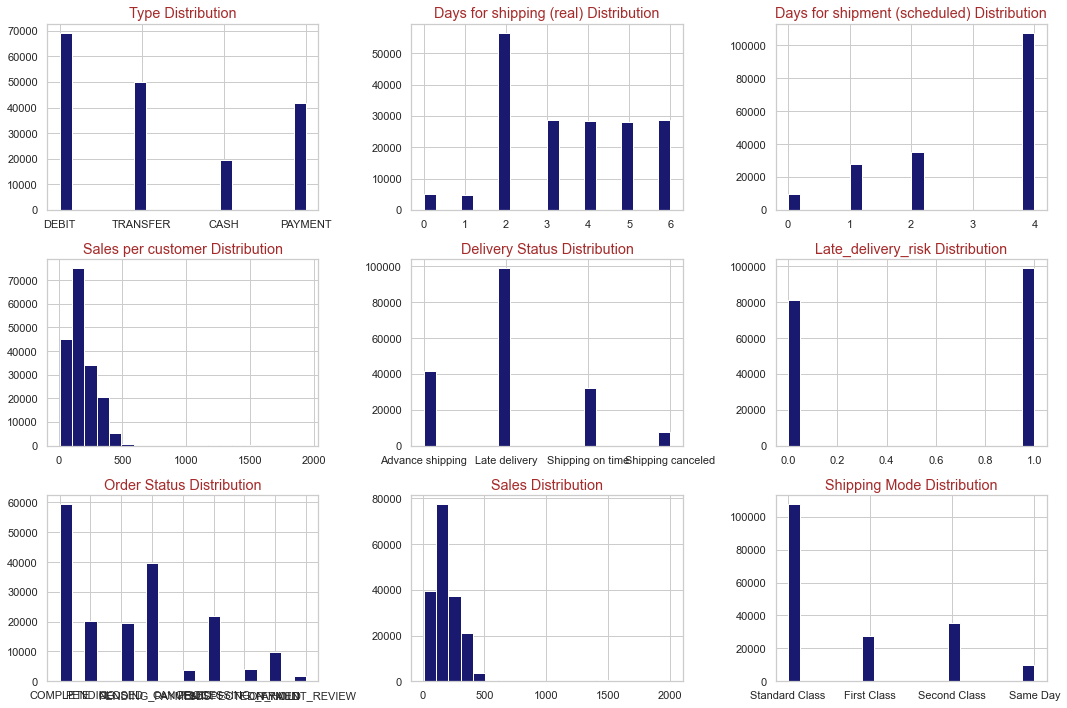

In [22]:
features = ['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Sales per customer', 
            'Delivery Status', 'Late_delivery_risk', 'Order Status', 'Sales', 'Shipping Mode']
plot_histograms(dataco_df, features, 3, 3)

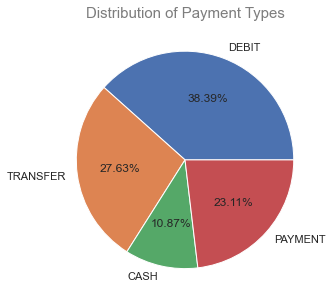

In [23]:
feature = dataco_df['Type']
title   = 'Distribution of Payment Types'
plot_piechart(feature, title)

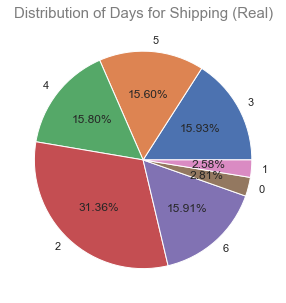

In [24]:
feature = dataco_df['Days for shipping (real)']
title   = 'Distribution of Days for Shipping (Real)'
plot_piechart(feature, title)

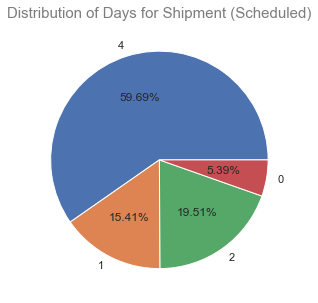

In [25]:
feature = dataco_df['Days for shipment (scheduled)']
title   = 'Distribution of Days for Shipment (Scheduled)'
plot_piechart(feature, title)

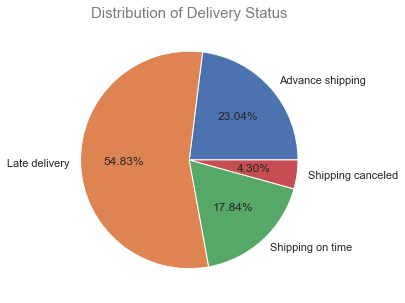

In [26]:
feature = dataco_df['Delivery Status']
title   = 'Distribution of Delivery Status'
plot_piechart(feature, title)

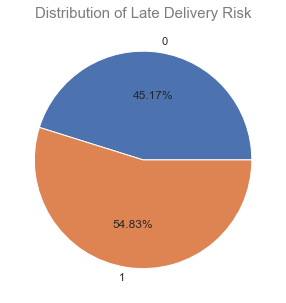

In [27]:
feature = dataco_df['Late_delivery_risk']
title   = 'Distribution of Late Delivery Risk'
plot_piechart(feature, title)

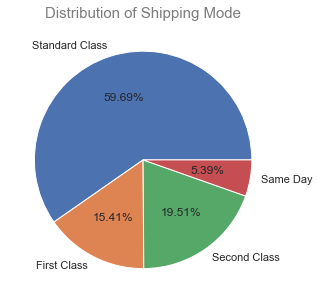

In [28]:
feature = dataco_df['Shipping Mode']
title   = 'Distribution of Shipping Mode'
plot_piechart(feature, title)

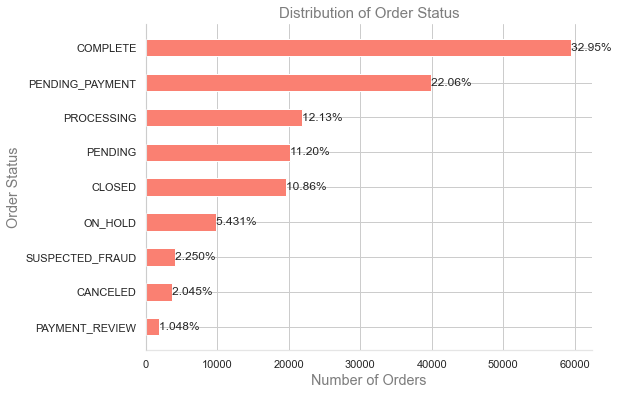

In [29]:
feature = dataco_df['Order Status']
title   = 'Distribution of Order Status'
xlabel  = 'Number of Orders'
ylabel  = 'Order Status'
color   = 'Salmon'
plot_barchart_hztl(dataco_df, feature, title, xlabel, ylabel, color)

#### 2.4.2.2. Draw Multivariate plots to better understand the relationship between attributes

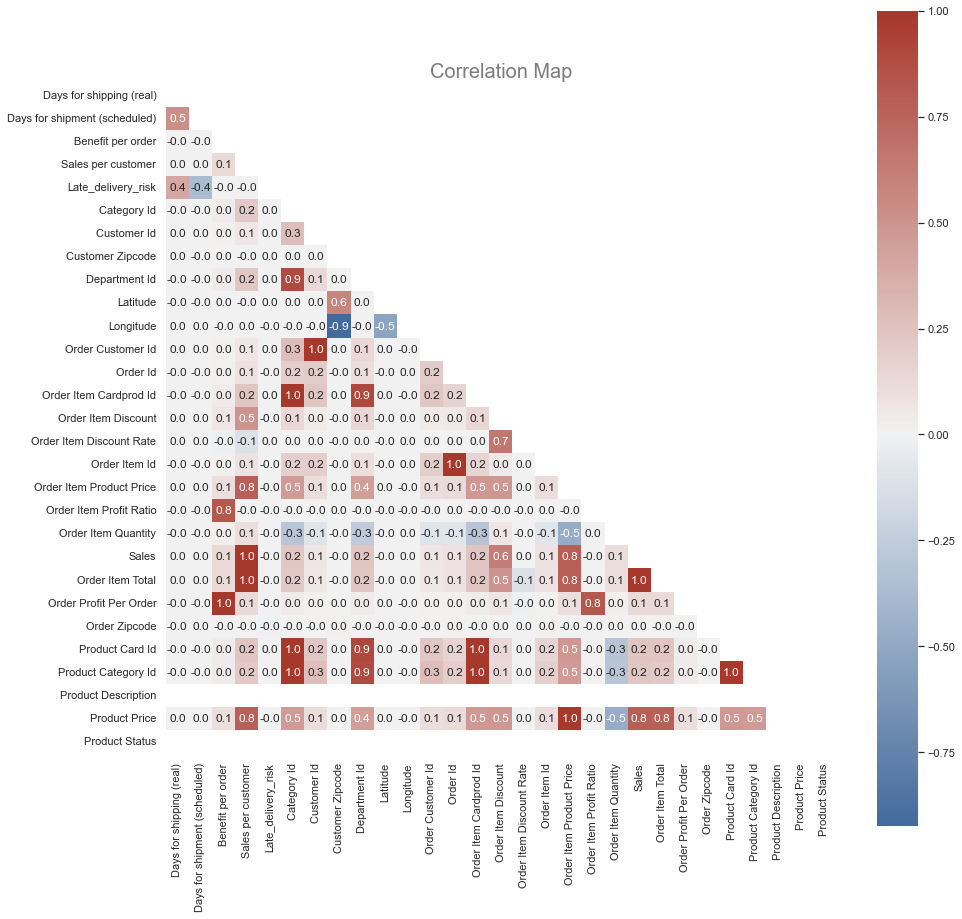

In [30]:
title = 'Correlation Map'
plot_correlationmap(dataco_df, title)

# 3. Research

## 3.1. List of selected algorithms to build models

### I) Data Analysis:
   * Plot Bar charts & Line charts to understand the current sales performance:
        - Total Sales by Markets, by Regions, and by Product Category
        - Total Sales vs Time by Qtr
   * Plot Bar charts to detect the revenue losses by markets, regions, product category
   * Plot Bar charts to detect the revenue losses caused by frauds, by regions, products, and customers
   * Plot Bar charts to detect the revenue losses caused by late deliveries, by regions, and products
   * Plot Bar charts to detect the revenue losses caused by shipping modes, by regions

### II) Clustering: 
Use `RFM Analysis` for customer segmentation as it produces numerical values which are easy to interpret.

RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency, and monetary total of their recent transactions to identify the best and worst customers and perform targeted marketing campaigns. The system assigns each customer a numerical score based on these factors to provide an objective analysis.

RFM analysis ranks each customer on the following factors:
  * **Recency:** How recent was the customer's last purchase?
  * **Frequency:** How often did this customer purchase in a given period?
  * **Monetary:** How much money did the customer spend in a given period?

### **`How RFM Analysis works?`**
**Step 1:** Calculate and assign R_Value, F_Value, and M_Value to each customer (all should be numerical values):
* Create a dataset for customer segmentation from the input dataset with only 3 attributes as given below, grouping by customer id.
* *`R_Value`*: Find out the latest order date, subtract it from the current date, and assign the difference in days. <br>
* *`F_value`*: Assign the number of orders placed by each customer. <br>
* *`M_value`*: Assign the total monetary value of all orders placed by the customer (select 'Order Item Total' instead of 'Sales' attribute to exclude discounts.

**Step 2:** Calculate and assign R_Score, F_Score, and M_Score to each customer (all should be numerical values):
* Assign a score from 1 to 5 with 5 being the highest and 1 being the lowest for each R_Value, F_Value, and M_Value.
* Use the `Quantile method` to assign the scores (use `Quintiles`, i.e., 5 segments of the distributions to assign 5 values ranging from 1 to 5).

**Step 3:** Calculate and assign RFM_Score to each customer (all should be numerical values):
* Depending on the business strategy, the RFM Analysis system may use various implementations to arrive at the RFM_Scores. 
* For example, assume R_Score=5, F_Score=2, M_Score=3
    - Method 1 (Add): Add the values, then the RFM Score =  10
    - Method 2 (Concatenate): Concatenate the values,  then the RFM Score = 523
    - Method 3 (Use weights): Multiply with weights and then add the values
* In this project, We will use the `Method 3, i.e., weightage approach` (using weights 3, 2, & 1 for R_Score, F_Score, & M_Score respectively) as given below:<br>
    - Multiply R_Score with weightage 3
    - Multiply F_Score with weightage 2
    - Multiply M_Score with weightage 1
    - Then, add all 3 values to get the RFM Score
    
    For example, if R_Score = 5, F_Score = 2, M_Score = 3, then, RFM_Score = 5x3 + 2x2 + 3 = 22

**Step 4:** Assign segment name to each customer:
* Find out the number of unique RFM scores; usually, it is a big number (more than 20). Too many segments may be difficult to interpret. Hence, reduce the number of segments to 8 and assign names as given below.
* Define customer segments names based on their RFM scores as given below.
* Use the `Quantile method` to assign the names (use use `Octiles`, i.e., 8 segments of the distributions to assign 8 different names).
```
                     RFM_Score <= quantile[0.25]   -->   Lost
    quantile[0.25] > RFM_Score <= quantile[0.50]   -->   At Risk
    quantile[0.50] > RFM_Score <= quantile[0.60]   -->   Cannot Loose
    quantile[0.60] > RFM_Score <= quantile[0.70]   -->   Promising
    quantile[0.70] > RFM_Score <= quantile[0.80]   -->   Loyal
    quantile[0.80] > RFM_Score <= quantile[0.90]   -->   Valuable
    quantile[0.90] > RFM_Score <= quantile[0.95]   -->   Most Valuable
    quantile[0.95] > RFM_Score <= quantile[1.00]   -->   Champions
```

**Step 5:** Plot a pie chart to visualize the customer's segments.

**A note of Quantiles:** Understanding Quantiles and their naming conventions (Quartiles, Percentiles, etc).
```
    The 2    quantiles are called `Median`
    The 3    quantiles are called `Terciles`
    The 4    quantiles are called `Quartiles`
    The 5    quantiles are called `Quintiles`
    The 6    quantiles are called `Sextiles`
    The 7    quantiles are called `Septiles`
    The 8    quantiles are called `Octiles`
    The 10   quantiles are called `Deciles`
    The 12   quantiles are called `Duodeciles`
    The 20   quantiles are called `Vigintiles`
    The 100  quantiles are called `Percentiles`
    The 1000 quantiles are called `Permilles`
```

## 3.2. List of model evaluation metrics

*This project does not involve the development of any predictive models such as regression or classification. Hence, there is no need for any evaluation metrics such as Accuracy or F1-Score, etc. for RFM Analysis*

# 4. Data Preprocessing

## 4.1. Data Cleaning

### 4.1.1. Basic data cleaning

#### Remove unwanted/duplicate columns/features/attributes

In [31]:
data_df = dataco_df.copy()
data_df.drop(columns=['Customer Email', 'Customer Password', 'Customer Street', 'Latitude', 'Longitude', 
                      'Order Zipcode', 'Product Description', 'Product Image', 'Product Status'], axis=1, inplace=True)
data_df.shape

(180519, 44)

#### Remove unwanted/duplicate rows/samples/examples

*No duplicates were found in the dataset in section 2.4.1.*

#### Remove embedded characters that may cause data misalignment

*No embedded characters were found in the dataset such as `tabs`, `(`, `)`, `[`, `]`, etc.*

#### Handling inconsistent data

*No inconsistent data values were found in the dataset such as `N.Y`, `NY`, or `New York`.*

### 4.1.2. Outliers detection

*Outliers were not detected and removed for the following reasons:*
   * *Outlier removals are usually done for Regression problems to avoid skews and this project does not include regression problems*
   * *All the data points are important in a clustering problem*

### 4.1.3. Handling missing Numerical values

In [32]:
data_df['Customer Zipcode'].fillna(value=0, inplace=True )   # Fill the 3 missing values found in section 2.4.1. with '0'
data_df['Customer Zipcode'].isnull().sum()

0

### 4.1.4. Handling missing Categorical values

*There are 8 missing values in the attribute `Customer Lname` which will be handled in the `Feature Engineering` section.*

## 4.2. Feature Selection

* *Part of `Feature Selection` has already been done in section 4.1.1., by removing unwanted features and features with lots of missing values.*
* *At this stage, all the remaining features are considered important as the problem solution involves clustering.*

## 4.3. Feature Engineering

*Create a new column named `Customer Fullname` for 2 reasons and remove `Customer Fname` & `Customer Lname`:*
   * *To avoid any ambiguities in common first names and last names*
   * *To handle the 8 missing values in `Customer Lname`*

In [33]:
data_df['Customer Fullname'] = data_df['Customer Fname'] + ' ' + data_df['Customer Lname']
data_df.drop(columns=['Customer Fname', 'Customer Lname'], axis=1, inplace=True)
data_df.shape

(180519, 43)

# 5. SOLUTION #1: DATA ANALYSIS

## 5.1. Understanding Current Sales Performance

### 5.1.1. Total Sales - by Market

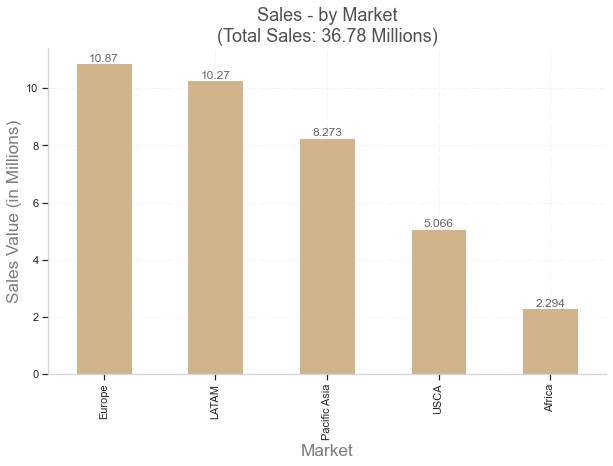

In [34]:
feature = 'Sales'
title   = 'Sales - by Market'
xlabel  = 'Market'
ylabel  = 'Sales Value'
color   = 'tan'

plot_barchart_sales(data_df.groupby('Market'), feature, title, xlabel, ylabel, color)

### 5.1.2. Total Sales - by Region

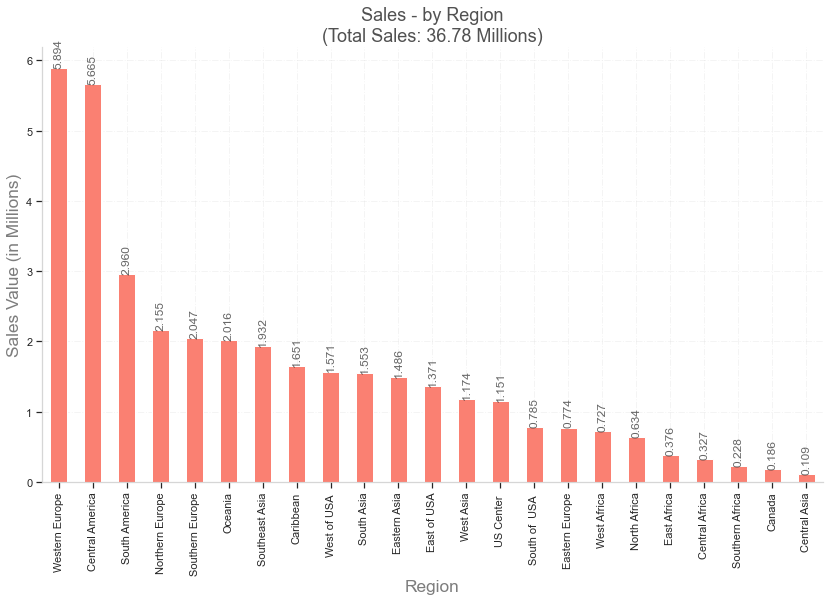

In [35]:
feature = 'Sales'
title   = 'Sales - by Region'
xlabel  = 'Region'
ylabel  = 'Sales Value'
color   = 'salmon'

plot_barchart_sales(data_df.groupby('Order Region'), feature, title, xlabel, ylabel, color)

### 5.1.3. Total Sales - by Product Category

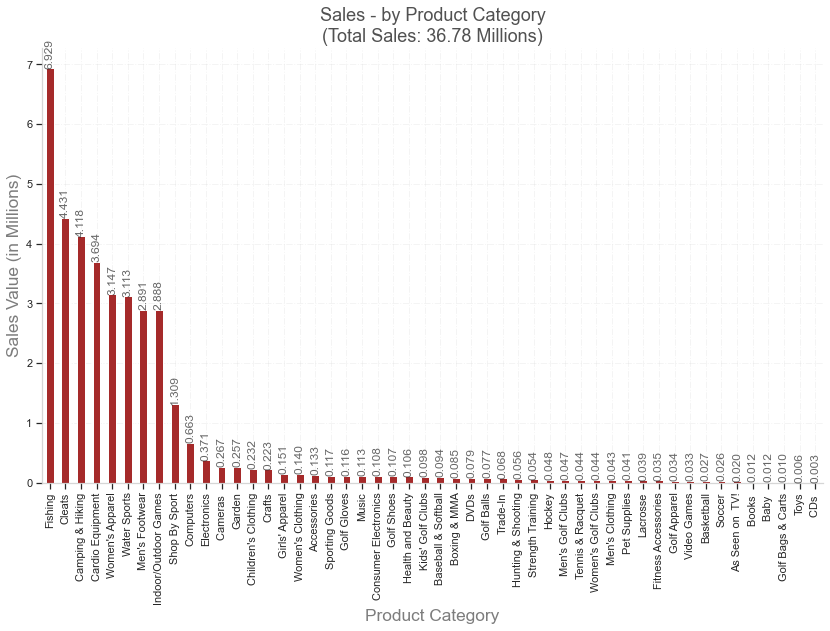

In [36]:
feature = 'Sales'
title   = 'Sales - by Product Category'
xlabel  = 'Product Category'
ylabel  = 'Sales Value'
color   = 'brown'

plot_barchart_sales(data_df.groupby('Category Name'), feature, title, xlabel, ylabel, color)

### 5.1.4. Sales Performance - by Quarter

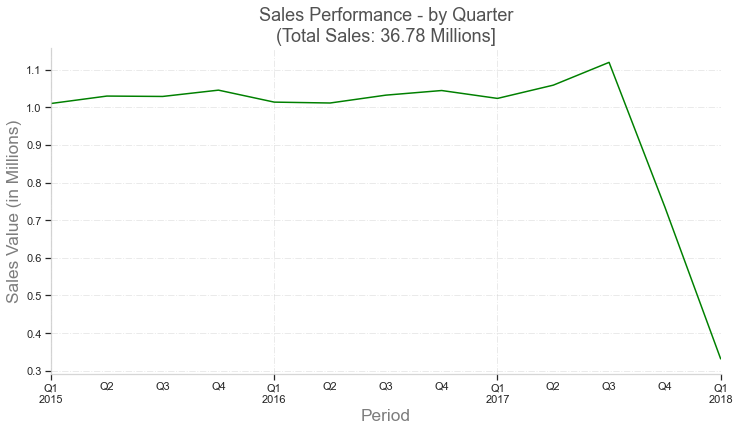

In [37]:
df1 = data_df.copy()
df1['order_year_month'] = pd.to_datetime(data_df['order date (DateOrders)']).dt.to_period('M')

grpby   = 'order_year_month'
feature = 'Sales'
title   = 'Sales Performance - by Quarter'
xlabel  = 'Period'
ylabel  = 'Sales Value'
color   = 'green'

plot_linechart_sales(df1, grpby, feature, title, xlabel, ylabel, color)

In [38]:
del df1;

## 5.2. Detecting Revenue Losses

### 5.2.1. Payment methods used - by Region

In [39]:
print("Types of Payment methods used by Customers are:", dataco_df['Type'].unique())

Types of Payment methods used by Customers are: ['DEBIT' 'TRANSFER' 'CASH' 'PAYMENT']


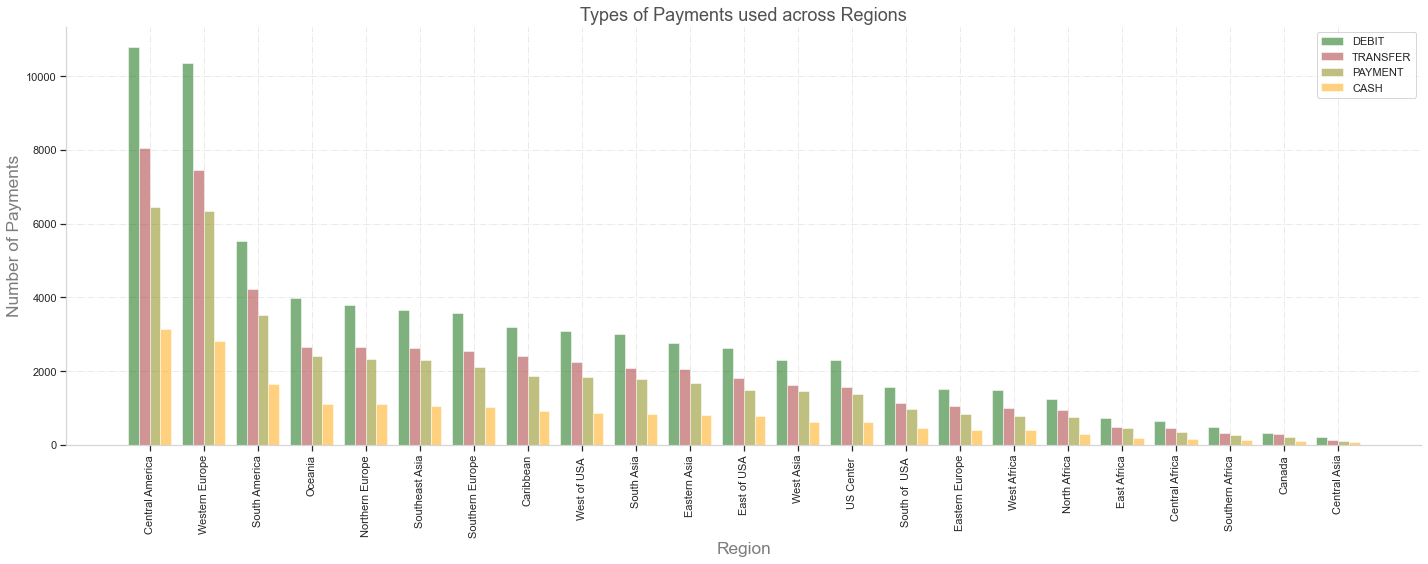

In [40]:
grpby   = 'Order Region'
feature = 'Type'
fval1   = 'DEBIT'
fval2   = 'TRANSFER'
fval3   = 'PAYMENT'
fval4   = 'CASH'
title   = 'Types of Payments used across Regions'
xlabel  = 'Region'
ylabel  = 'Number of Payments'
c1      = 'darkgreen'
c2      = 'brown'
c3      = 'olive'
c4      = 'orange'

plot_4barcharts(data_df, grpby, feature, fval1, fval2, fval3, fval4, title, xlabel, ylabel, c1, c2, c3, c4)

### 5.2.2. Market-wise Revenue Loss

In [41]:
loss_df = data_df[(data_df['Benefit per order'] < 0)]
print("Number of orders with Losses:", len(loss_df))

Number of orders with Losses: 33784


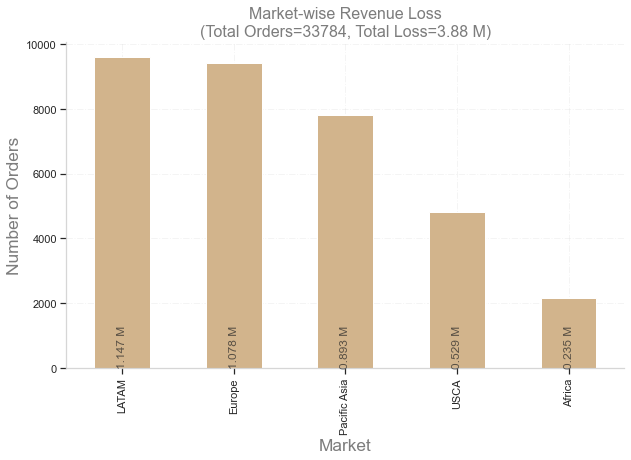

In [42]:
grpby   = 'Market'
top     = 10
feature = 'Benefit per order'
title   = 'Market-wise Revenue Loss'
xlabel  = 'Market'
ylabel  = 'Number of Orders'
color   = 'tan'

plot_barchart_loss(loss_df, grpby, top, feature, title, xlabel, ylabel, color)

### 5.2.3. Region-wise Revenue Loss - Top 10

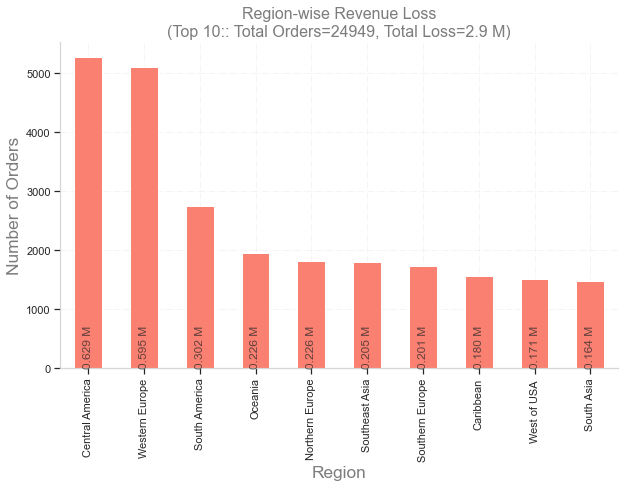

In [43]:
grpby   = 'Order Region'
top     = 10
feature = 'Benefit per order'
title   = 'Region-wise Revenue Loss'
xlabel  = 'Region'
ylabel  = 'Number of Orders'
color   = 'salmon'

plot_barchart_loss(loss_df, grpby, top, feature, title, xlabel, ylabel, color)

### 5.2.4. Product-wise Revenue Loss - Top 10

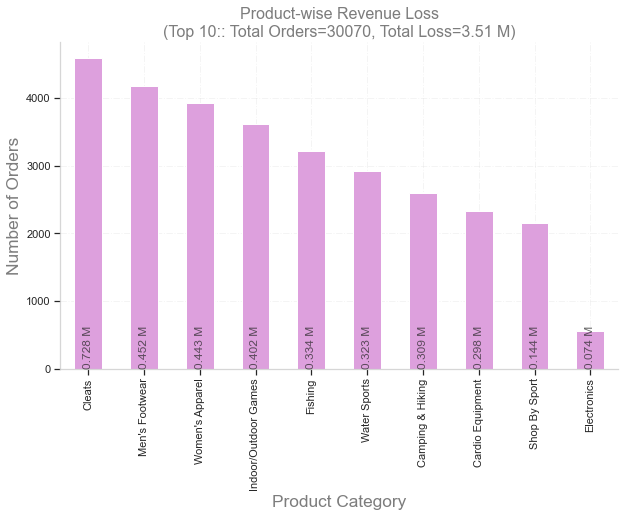

In [44]:
grpby   = 'Category Name'
top     = 10
feature = 'Benefit per order'
title   = 'Product-wise Revenue Loss'
xlabel  = 'Product Category'
ylabel  = 'Number of Orders'
color   = 'plum'

plot_barchart_loss(loss_df, grpby, top, feature, title, xlabel, ylabel, color)

In [45]:
del loss_df;

## 5.3. Detecting Revenue Loss caused by Fraud

In [46]:
fraud_df = data_df[(data_df['Order Status'] == 'SUSPECTED_FRAUD')]
print("Number of orders with Suspected Frauds:             ", len(fraud_df))
print("Payments methods used for Frauds:                   ", fraud_df['Type'].unique())
print("Total Revenue Loss due to Frauds across all Markets:", round(fraud_df['Sales'].sum()/1000000, 2), "M")

Number of orders with Suspected Frauds:              4062
Payments methods used for Frauds:                    ['TRANSFER']
Total Revenue Loss due to Frauds across all Markets: 0.83 M


### 5.3.1. Regions with Highest Fraud - Top 10

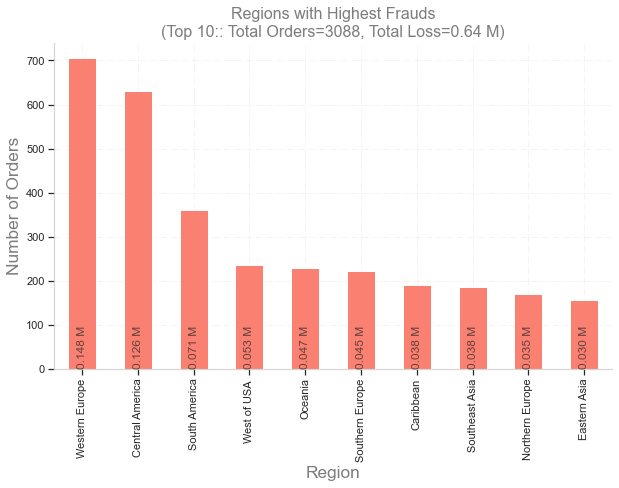

In [47]:
grpby   = 'Order Region'
top     = 10
feature = 'Sales'
title   = 'Regions with Highest Frauds'
xlabel  = 'Region'
ylabel  = 'Number of Orders'
color   = 'salmon'

plot_barchart_loss(fraud_df, grpby, top, feature, title, xlabel, ylabel, color)

### 5.3.2. Products with Highest Fraud - Top 10

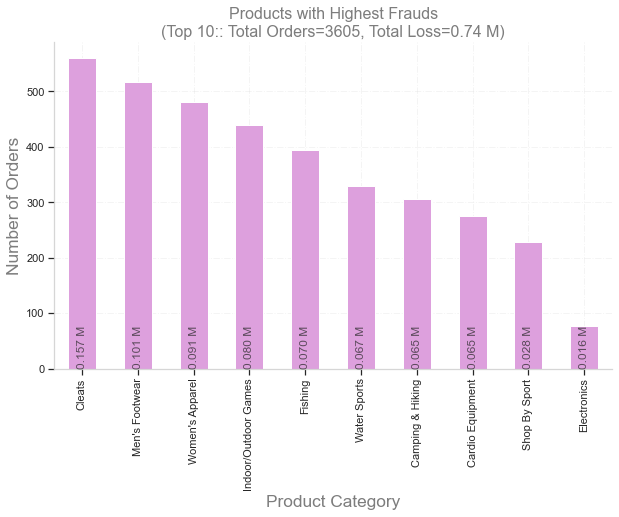

In [48]:
grpby   = 'Category Name'
top     = 10
feature = 'Sales'
title   = 'Products with Highest Frauds'
xlabel  = 'Product Category'
ylabel  = 'Number of Orders'
color   = 'plum'

plot_barchart_loss(fraud_df, grpby, top, feature, title, xlabel, ylabel, color)

### 5.3.3. Customers with Highest Fraud - Top 10

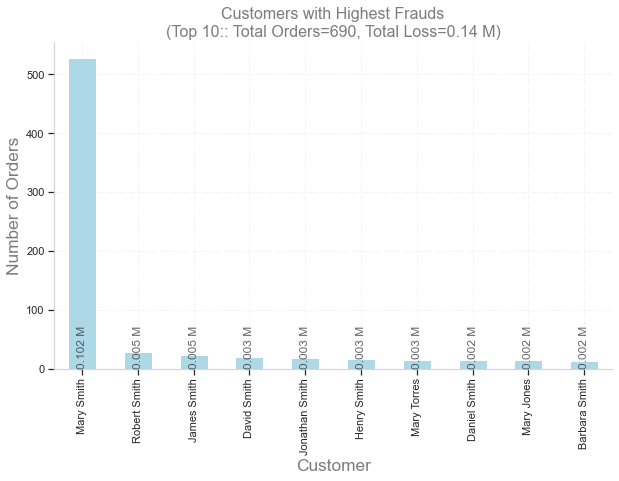

In [49]:
grpby   = 'Customer Fullname'
top     = 10
feature = 'Sales'
title   = 'Customers with Highest Frauds'
xlabel  = 'Customer'
ylabel  = 'Number of Orders'
color   = 'lightblue'

plot_barchart_loss(fraud_df, grpby, top, feature, title, xlabel, ylabel, color)

In [50]:
print('Number of Fraudulent Orders made by MARY SMITH:', len(fraud_df[(fraud_df['Customer Fullname'] == 'Mary Smith')]))

Number of Fraudulent Orders made by MARY SMITH: 528


In [51]:
del fraud_df;

## 5.4. Detecting Revenue Loss caused by Late Deliveries

In [52]:
late_df = data_df[(data_df['Late_delivery_risk'] == 1) & (data_df['Delivery Status'] == 'Late delivery')]
print("Number of orders with Late Delivery:                       ", len(late_df))
print("Total Revenue Loss due to Late Delivery across all Markets:", round(late_df['Benefit per order'].sum()/1000000, 2), "M")

Number of orders with Late Delivery:                        98977
Total Revenue Loss due to Late Delivery across all Markets: 2.14 M


### 5.4.1. Regions with Highest Late Deliveries - Top 10

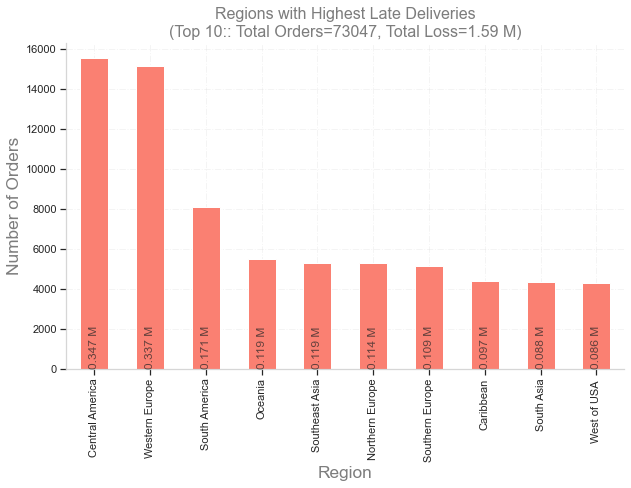

In [53]:
grpby   = 'Order Region'
top     = 10
feature = 'Benefit per order'
title   = 'Regions with Highest Late Deliveries'
xlabel  = 'Region'
ylabel  = 'Number of Orders'
color   = 'salmon'

plot_barchart_loss(late_df, grpby, top, feature, title, xlabel, ylabel, color)

### 5.4.2. Products with Highest Late Deliveries - Top 10

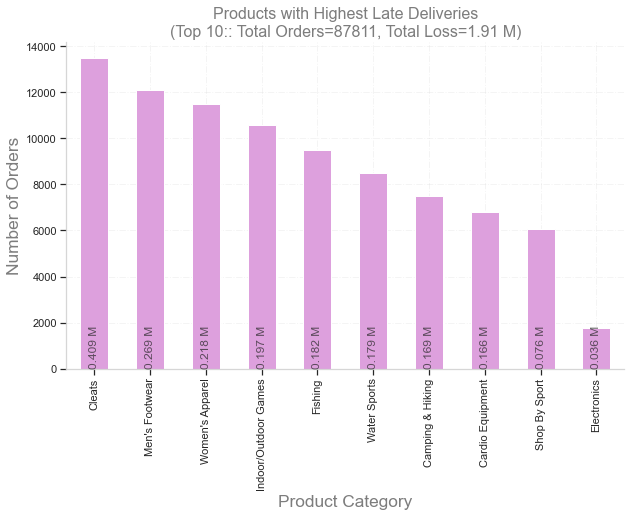

In [54]:
grpby   = 'Category Name'
top     = 10
feature = 'Benefit per order'
title   = 'Products with Highest Late Deliveries'
xlabel  = 'Product Category'
ylabel  = 'Number of Orders'
color   = 'plum'

plot_barchart_loss(late_df, grpby, top, feature, title, xlabel, ylabel, color)

### 5.4.3. Regions with Highest Late Deliveries, by Shipping Mode - Top 10

In [55]:
print("Different Shipping Modes used are:", late_df['Shipping Mode'].unique())

Different Shipping Modes used are: ['Standard Class' 'First Class' 'Second Class' 'Same Day']


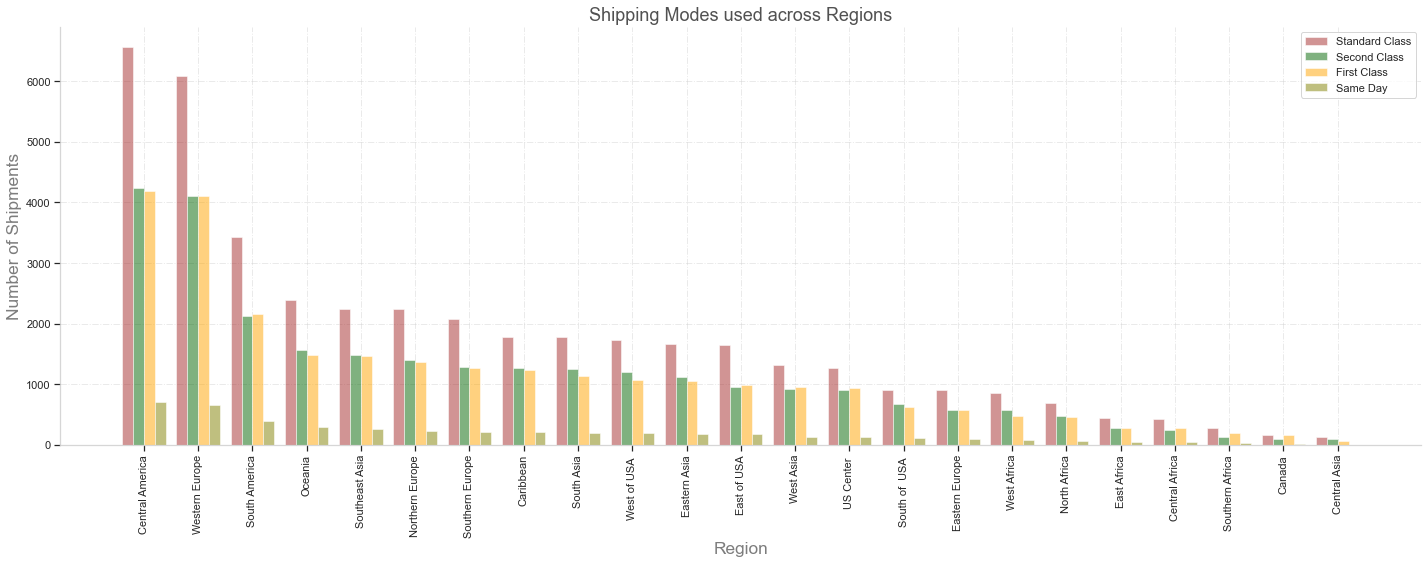

In [56]:
grpby   = 'Order Region'
feature = 'Shipping Mode'
fval1   = 'Standard Class'
fval2   = 'Second Class'
fval3   = 'First Class'
fval4   = 'Same Day'
title   = 'Shipping Modes used across Regions'
xlabel  = 'Region'
ylabel  = 'Number of Shipments'
c1      = 'brown'
c2      = 'darkgreen'
c3      = 'orange'
c4      = 'olive'

plot_4barcharts(late_df, grpby, feature, fval1, fval2, fval3, fval4, title, xlabel, ylabel, c1, c2, c3, c4)

In [57]:
del late_df;

# 6. SOLUTION #2: CUSTOMER SEGMENTATION

## 6.1. Assign R_Values, F_Values, and M_Values

#### Find out the most recent order date:

In [58]:
temp_df = data_df.copy()
temp_df['order date (DateOrders)'] = pd.to_datetime(temp_df['order date (DateOrders)'])
temp_df['order date (DateOrders)'].max()

Timestamp('2018-01-31 23:38:00')

*The date of the last order was 2018-01-31. To be on the safer side while handling the recency value, the current date is set slightly above the last order date.*

In [59]:
cdate = dt.datetime(2018,2,1)

<IPython.core.display.Javascript object>

#### Create a new dataframe for Customer Segmentation with only relevant attributes:
```
Order Customer Id
order date (DateOrders) - for the `Recency` value
Order Id                - for the `Frequency` value
Sales                   - for the `Monetary` value
```

In [60]:
cseg_df = temp_df.groupby('Order Customer Id').agg({'order date (DateOrders)': lambda x: (cdate - x.max()).days,
                                                    'Order Id': lambda x: len(x),
                                                    'Order Item Total': lambda x: x.sum()})

#### Rename the relevant columns for RFM values:

In [61]:
cseg_df.rename(columns = {'order date (DateOrders)': 'R_Value',
                          'Order Id': 'F_Value',
                          'Order Item Total': 'M_Value'}, inplace=True)
cseg_df.head()

,R_Value,F_Value,M_Value
Order Customer Id,,,
1,792,1,472.45
2,136,10,1618.66
3,229,18,3189.20
4,380,14,1480.71
5,457,7,1101.92


In [62]:
del temp_df;

#### Distribution of 'R value':

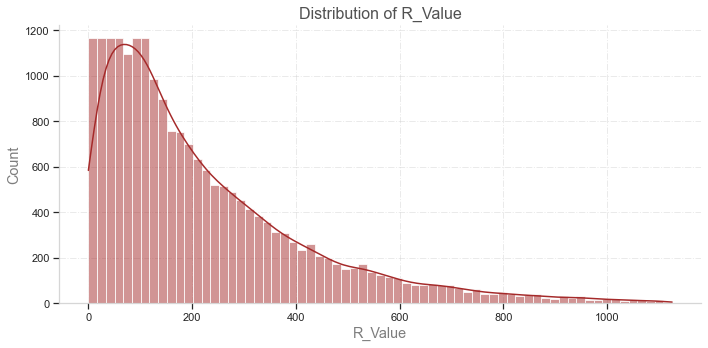

In [63]:
feature = 'R_Value'
kde     = True
title   = 'Distribution of R_Value'
ylabel  = 'Count'
color   = 'brown'

plot_histkde(cseg_df, feature, kde, title, feature, ylabel, color)

#### Distribution of 'F value':

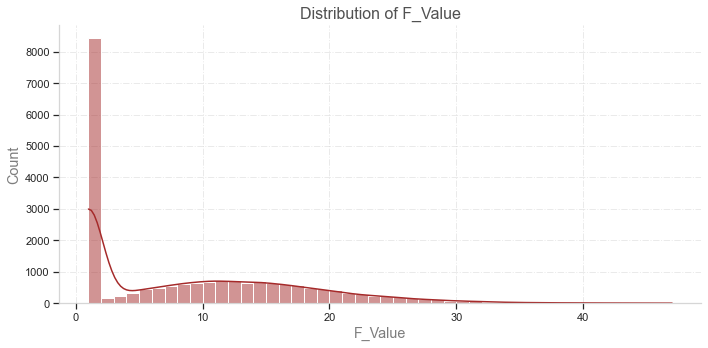

In [64]:
feature = 'F_Value'
kde     = True
title   = 'Distribution of F_Value'
ylabel  = 'Count'
color   = 'brown'

plot_histkde(cseg_df, feature, kde, title, feature, ylabel, color)

#### Distribution of 'M value':

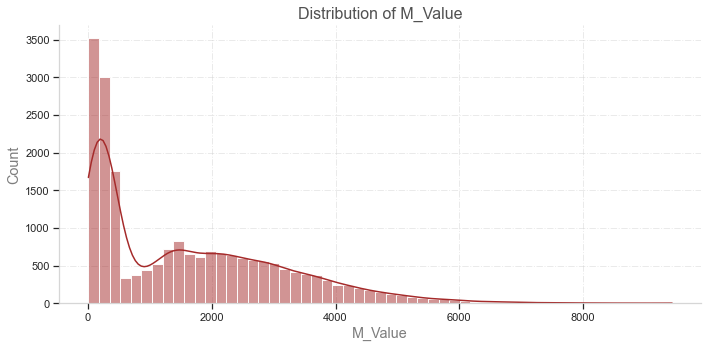

In [65]:
feature = 'M_Value'
kde     = True
title   = 'Distribution of M_Value'
ylabel  = 'Count'
color   = 'brown'

plot_histkde(cseg_df, feature, kde, title, feature, ylabel, color)

## 6.2. Assign R_Scores, F_Scores, and M_Scores

#### Calculate RFM Quantile values:

In [66]:
rfm_quantiles = cseg_df.quantile(q=[0.2, 0.4, 0.6, 0.8, 1.0])
rfm_quantiles = rfm_quantiles.to_dict()
rfm_quantiles

{'R_Value': {0.2: 60.0, 0.4: 120.0, 0.6: 207.0, 0.8: 353.0, 1.0: 1125.0},
 'F_Value': {0.2: 1.0, 0.4: 1.0, 0.6: 10.0, 0.8: 16.0, 1.0: 47.0},
 'M_Value': {0.2: 208.5200043,
  0.4: 521.9299927,
  0.6: 1792.972000106,
  0.8: 2935.856039431999,
  1.0: 9436.610088329999}}

#### Assign R_Score, F_Score, and M_Score individual customers:

In [67]:
cseg_df['R_Score'] = cseg_df['R_Value'].apply(assign_RScores,  args=(rfm_quantiles, 'R_Value'))
cseg_df['F_Score'] = cseg_df['F_Value'].apply(assign_FMScores, args=(rfm_quantiles, 'F_Value'))
cseg_df['M_Score'] = cseg_df['M_Value'].apply(assign_FMScores, args=(rfm_quantiles, 'M_Value'))
cseg_df

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score
Order Customer Id,,,,,,
1,792,1,472.45,5,5,4
2,136,10,1618.66,3,3,3
3,229,18,3189.20,4,1,1
4,380,14,1480.71,5,2,3
5,457,7,1101.92,5,3,3
...,...,...,...,...,...,...
20753,0,1,161.87,1,5,5
20754,0,1,172.66,1,5,5
20755,0,1,314.64,1,5,4


## 6.3. Assign RFM_Scores

#### Calculate and assign the RMF Scores:

In [68]:
rw, fw, mw = 3, 2, 1
cseg_df['RFM_Score'] = cseg_df['R_Score']*rw + cseg_df['F_Score']*fw + cseg_df['M_Score']*mw

## 6.4. Assign Segment names

#### How many unique RFM_Scores are generated?

In [69]:
print(np.sort(cseg_df['RFM_Score'].unique()))

[12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 29 30]


`18 unique RFM_Scores` have been generated. In other words, there are `18 customer segments` and their values range from 12 to 30. Let's reduce the number of segments to `8 segments` using the quantile mechanism (called `octiles`).

#### Calculate Customer Segment Quantile values:

In [70]:
#cseg_quantiles = cseg_df.quantile(q=[0.20, 0.30, 0.50, 0.65, 0.80, 0.90, 1.00])
cseg_quantiles = cseg_df.quantile(q=[0.25, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 1.00])
cseg_quantiles.to_dict()
cseg_quantiles

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score
0.25,75.0,1.0,254.940,2.0,2.0,2.0,17.0
0.50,159.0,7.0,1294.505,3.0,3.0,3.0,18.0
0.60,207.0,10.0,1792.972,3.0,5.0,4.0,20.0
0.70,269.7,13.0,2325.160,4.0,5.0,4.0,20.0
0.80,353.0,16.0,2935.856,4.0,5.0,5.0,21.0
0.90,498.9,21.0,3754.810,5.0,5.0,5.0,23.0
0.95,640.0,24.0,4448.157,5.0,5.0,5.0,24.0
1.00,1125.0,47.0,9436.610,5.0,5.0,5.0,30.0


#### Assign Customer Segments to individual customers:

In [71]:
cseg_df['Customer Segment'] = cseg_df['RFM_Score'].apply(assign_segments, args=(cseg_quantiles, 'RFM_Score'))
cseg_df

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score,Customer Segment
Order Customer Id,,,,,,,,
1,792,1,472.45,5,5,4,29,Champions
2,136,10,1618.66,3,3,3,18,At Risk
3,229,18,3189.20,4,1,1,15,Lost
4,380,14,1480.71,5,2,3,22,Valuable
5,457,7,1101.92,5,3,3,24,Most Valuable
...,...,...,...,...,...,...,...,...
20753,0,1,161.87,1,5,5,18,At Risk
20754,0,1,172.66,1,5,5,18,At Risk
20755,0,1,314.64,1,5,4,17,Lost


## 6.5. Visualize Customer Segments

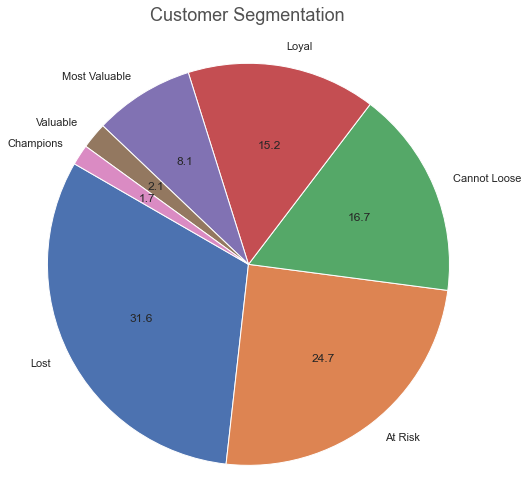

In [72]:
cseg_df['Customer Segment'].value_counts().plot.pie(figsize=(8,8), startangle=150, autopct='%.1f')
plt.title('Customer Segmentation \n', size=18, alpha=0.8)
plt.ylabel('')
plt.axis('equal')
plt.show()

# 7. Final Report

### 7.1. Background   
A supply chain company DataCo Global provided a dataset containing its sales data collected over 4 years, from 2015 to 2018, to understand its sales performance and to increase the revenue. Two techniques were used to address its purpose:
* Detailed Data Analysis to understand sales performance and to identify revenue losses due to frauds, late deliveries, and shipping modes
* Clustering for Customer Segmentation

### 7.2. Summary of findings and recommendations   
**Current sales performance summary:**
* Total sales made by the company were 36.78 M.
* Sales performance was steady from 2015-Q1 till 2017-Q1, it was improving slightly till 2017-Q3, then it declined steeply and reached almost to 0 by 2018-Q1.
* *Western Europe* and *Central America* are the 2 topmost regions with highest sales and also costed the company with highest revenue losses.

**Fraud summary:**
* The company lost 830K due to fraudulent transactions across all regions and the only payment method used was *TRANSFER*. 
* *Western Europe* and *Central America* top the fraud list.

**Late delivery summary:**
* The company lost 2.14 M due to late deliveries across all regions.
* *Western Europe* and *Central America* top the late delivery list too.
* Though all 4 types of shipping modes contributed to late deliveries, the *Standard Class* stands out on the top.

**Customer segmentation summary:**
* The reason for the poor sales performance after 2017-Q3 was due massive reduction in the customer base, to the tune of 73%. 
* And, the reason for the massive customer base reduction could be due to the company's close down or acquisition by another company or a merger with another company.

**Recommendations:**
* *Western Europe* and *Central America* are the two most challenging regions to do business with that topped in both frauds and late deliveries, and the company needs to come up with an improved strategy to do business in these regions.
* Blacklist the customer 'Mary Smith' who single-handedly caused the revenue loss of 102 K with 528 orders, using different addresses for different orders.
* To reduce fraud, the company needs to work on tightening the securities for the *TRANSFER* type of payment method.
* To reduce late deliveries, the company needs to work on finding an alternate mode of shipment for *Standard Class*.

### 7.3. Details of findings
**Findings on current sales performance:**
* Total sales made by the company was 36.78 M. *Western Europe* (5.9 M) and *Central America* (5.6 M) are the 2 regions with the highest amount of sales.
* The single top-most product sold was *Fishing* (6.9 M) followed by *Cleats* (4.1 M), *Camping & Hiking* (4.1 M), *Cardio Equipment* (3.7 M), and so on.
* Sales performance was steady from 2015-Q1 till 2017-Q1, it was improving slightly till 2017-Q3, then it declined steeply and reached almost to 0 by 2018-Q1.
    - *DEBIT* was the most preferred payment method used by customers across all regions.
    - The company suffered a revenue loss of 3.88 M across all 5 markets with *Latin America* and *Europe* being the 2 topmost markets.
    - *Central America* (629 K) *Western Europe* (595 K) are the 2 regions with the highest revenue loss.
    - The highest revenue loss made by the product was *Cleats* (728 K) followed by *Men's Footwear* (452 K), *Women's Apparel* (443 K), and so on.

**Findings on Fraud:**
* The company suffered revenue loss, due to FRAUD, which was 830 K across all regions and the only payment method used was *TRANSFER* with 4,062 orders.
* The top regions with revenue loss, due to FRAUD, were *Western Europe* (148 K) followed by *Central America* (126 K), *South America* (71 K), and so on.
* The top product with revenue loss was *Cleats* (157 K) followed by *Men's Footwear* (101 K), *Women's Apparel* (91 K), and so on.
* The single most revenue loss caused by the customer was *Mary Smith* (102 K).

**Findings on late delivery:**
* The company suffered revenue loss, due to LATE DELIVERIES, which was 2.14 M across all regions with 98,977 orders.
* The top regions with revenue loss, due to LATE DELIVERIES, were *Central America* (347 K), followed by *Western Europe* (337 K) *South America* (171 K), and so on.
* The top products with revenue loss, due to LATE DELIVERIES, were *Cleats* (409 K) followed by *Men's Footwear* (269 K), *Women's Apparel* (218 K), and so on.
* All 4 types of shipping modes caused late deliveries, where the 'Standard Class' contributed the most, both 'Second Class' & ' First Class' contribute moderately, and 'Same Day' contributed the least.

**Findings on customer segmentation:**
* The 'Customer Segmentation' visual (Pie-chart in Sec 6.5) explains the reasons for the sudden decline in the 'Sales Performance - by Quarter' visual (Line-chart in 5.1.4).
* The reason for the poor sales performance after 2017-Q3 was due massive reduction in the customer base, to the tune of 73% (Lost - 31.6%, At Risk - 24.7%, Cannot Loose - 16.7%).